In [1]:
import matplotlib as mpl
# mpl.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Data Exploration

In [2]:
# Take a look into csv file
df = pd.read_csv('data/data.csv')
df.date = pd.to_datetime(df.date, format='%Y%m')
df.index = df.date

In [3]:
df.head()

,date,gangnam_price,gangbook_price,Seeking_jobs_in_Seoul_numbers
date,,,,
2013-01-01,2013-01-01,526716,368940,4247.0
2013-02-01,2013-02-01,525056,367773,4247.0
2013-03-01,2013-03-01,528064,367142,4247.0
2013-04-01,2013-04-01,530252,366278,5561.0
2013-05-01,2013-05-01,531736,366451,5561.0


In [4]:
# modifying data
df.Seeking_jobs_in_Seoul_numbers = df.Seeking_jobs_in_Seoul_numbers[:'2018-01-01']
df.gangbook_price = df.gangbook_price[:'2018-01-01']
df.gangnam_price = df.gangnam_price[:'2018-01-01']
df['Seeking_jobs_gradient'] = np.gradient(df.Seeking_jobs_in_Seoul_numbers)
df.head()

,date,gangnam_price,gangbook_price,Seeking_jobs_in_Seoul_numbers,Seeking_jobs_gradient
date,,,,,
2013-01-01,2013-01-01,526716.0,368940.0,4247.0,0.0
2013-02-01,2013-02-01,525056.0,367773.0,4247.0,0.0
2013-03-01,2013-03-01,528064.0,367142.0,4247.0,657.0
2013-04-01,2013-04-01,530252.0,366278.0,5561.0,657.0
2013-05-01,2013-05-01,531736.0,366451.0,5561.0,0.0


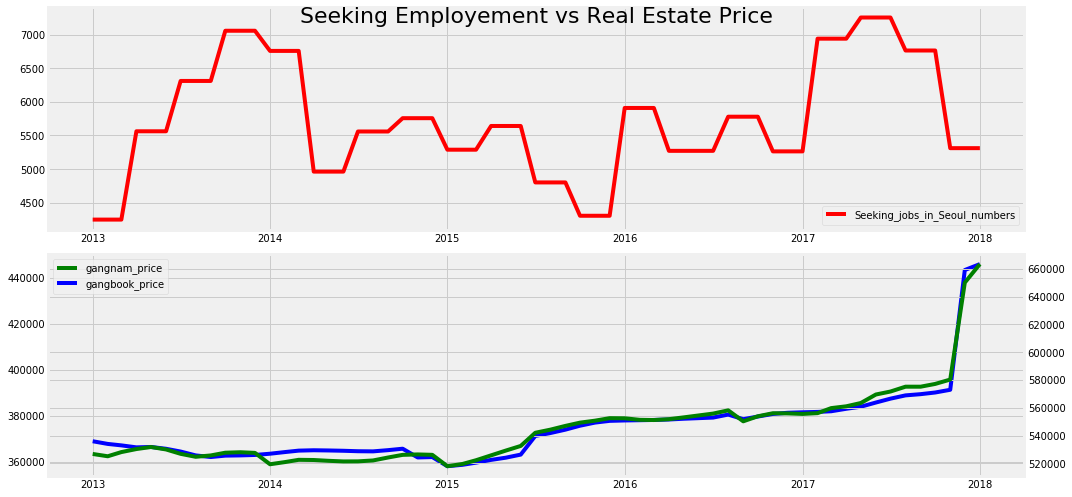

In [5]:
# plotting
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Seeking Employement vs Real Estate Price', fontsize=22)
plt.subplot(211)
plt.plot(df.Seeking_jobs_in_Seoul_numbers, 'red')
plt.legend()

plt.subplot(212)
gangbook_price, = plt.plot(df.gangbook_price, 'b')
plt.tick_params(axis='y')
plt.twinx()
gangnam_price, =plt.plot(df.gangnam_price, 'g')
plt.tick_params(axis='y')
plt.legend(handles=[gangnam_price, gangbook_price])
plt.tight_layout()
plt.show()

observation: gangnam and ganbook real real estate has a strong positive relationship

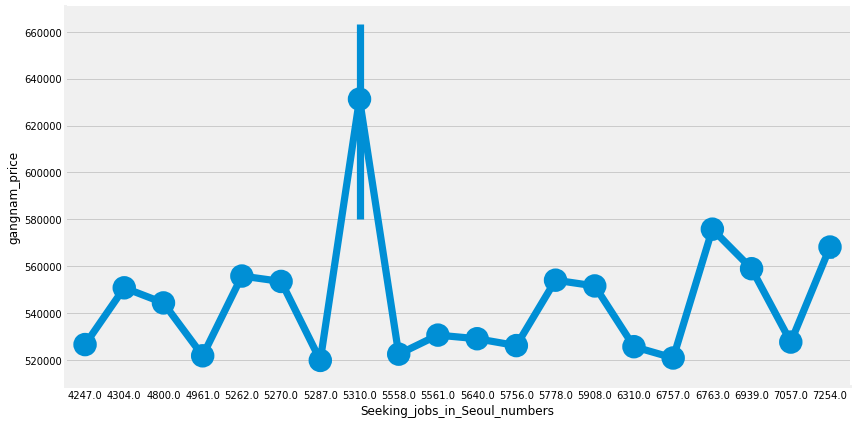

In [6]:
sns.factorplot('Seeking_jobs_in_Seoul_numbers','gangnam_price', data=df, size=6, aspect=2)
plt.show()

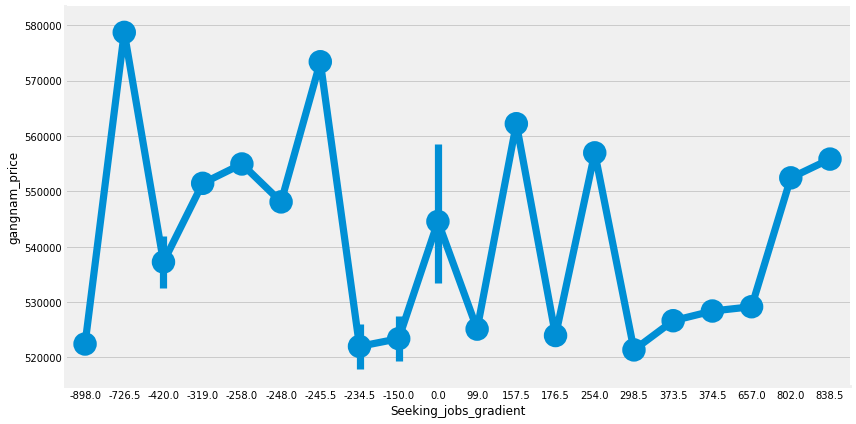

In [7]:
sns.factorplot('Seeking_jobs_gradient','gangnam_price', data=df, size=6, aspect=2)
plt.show()

Observation: Number of Employeement and real estate prices itself does not show clear relationship

## Using Statistics Tools

In [8]:
def normalization(array):
    """ scale data to 0~1"""

    y = np.array(array)
    y = y.reshape(-1, 1)
    min_max_scaler = MinMaxScaler()
    y = min_max_scaler.fit_transform(y)
    # checking if array contains NaN
    numpy_1 = np.array(array)
    if np.isnan(numpy_1).any():
        return None
    return y

# find prior event
def granger(array1, array2):
    df = pd.DataFrame(normalization(array1))
    df['1'] = pd.DataFrame(normalization(array2))


    granger = grangercausalitytests(df, maxlag=18, verbose=True)
    min = 10
    best_lag = 0
    for i in granger:
        p_value = granger[i][0]['ssr_ftest'][1]
        if p_value < min:
            min = p_value
            best_lag = i
    return min, best_lag

In [9]:
#cleaning input data for def granger():
df = pd.read_csv('data/data.csv')
date = df['date'].values
gangnam_price = df['gangnam_price'].values
Seeking_jobs = df['Seeking_jobs_in_Seoul_numbers'].values
Seeking_jobs = Seeking_jobs[np.logical_not(np.isnan(Seeking_jobs))]
min = min([len(Seeking_jobs), len(gangnam_price)])
Seeking_jobs = Seeking_jobs[:min]
gangnam_price = gangnam_price[:min]

Null Hypothesis: There is no such relationship

In [10]:
granger(gangnam_price, Seeking_jobs)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0258  , p=0.3155  , df_denom=56, df_num=1
ssr based chi2 test:   chi2=1.0808  , p=0.2985  , df=1
likelihood ratio test: chi2=1.0710  , p=0.3007  , df=1
parameter F test:         F=1.0258  , p=0.3155  , df_denom=56, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.8202  , p=0.0282  , df_denom=53, df_num=2
ssr based chi2 test:   chi2=8.3612  , p=0.0153  , df=2
likelihood ratio test: chi2=7.8108  , p=0.0201  , df=2
parameter F test:         F=3.8202  , p=0.0282  , df_denom=53, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4308  , p=0.0760  , df_denom=50, df_num=3
ssr based chi2 test:   chi2=8.3134  , p=0.0400  , df=3
likelihood ratio test: chi2=7.7603  , p=0.0512  , df=3
parameter F test:         F=2.4308  , p=0.0760  , df_denom=50, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8749  , p=0.1306  , df_d

(0.02819124506226828, 2)

#### Interpretation

Using ssr based F test, we cannot reject the null hypothesis since p > .01 

But, p is close enough to .01 meaning the correlations are not ordinary.

Still, Number of Seeking Employment is NOT a direct cause or a prior event to Seoul real estate price.